In [35]:
# Task:
# Feature Scaling 
# Balancing the Dataset
# Model training & Evaluation
# Feature Importance
# Pickling the data 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, f1_score,precision_recall_curve,auc
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
x_train = pd.read_csv(r"C:\Creditcardproject\data\x_train.csv")
y_train = pd.read_csv(r"C:\Creditcardproject\data\y_train.csv")
x_test = pd.read_csv(r"C:\Creditcardproject\data\x_test.csv")
y_test = pd.read_csv(r"C:\Creditcardproject\data\y_test.csv")
x = pd.read_csv(r"C:\Creditcardproject\data\x.csv")

## Feature Scaling

### Using Standard scaler to scale the dataset

In [5]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)

x_train_scaled

array([[ 0.35176206, -0.50079549,  0.59365959, ..., -0.13882583,
         0.10965825,  0.50720799],
       [-0.56663492,  0.62453953,  0.83532851, ...,  0.69914344,
         0.61212475, -0.28952286],
       [ 1.00615952, -0.37035759, -0.22533038, ..., -0.0777069 ,
        -0.19692383, -0.31674647],
       ...,
       [ 0.6458217 , -0.02896951, -0.47948179, ...,  0.11077403,
         0.07515426, -0.33552275],
       [ 1.01866598, -0.08081096, -0.77053458, ..., -0.1861791 ,
        -0.17256979, -0.19548132],
       [-0.24273786,  0.50072703,  0.87717806, ..., -0.33570689,
        -0.14781419, -0.35353837]])

### Scaling the test data

In [6]:
x_test_scaled = sc.transform(x_test)

x_test_scaled

array([[ 0.54022723, -0.46550586,  0.1046982 , ...,  0.25227992,
         0.12138824, -0.12766251],
       [-2.47899334,  2.65679643, -0.60822054, ...,  1.08527463,
        -1.33937879, -0.31422428],
       [-0.80164059, -0.15814682,  1.02945679, ..., -1.27358447,
        -0.76469915, -0.1690584 ],
       ...,
       [ 0.58747271,  0.26366402, -0.41351457, ..., -0.02650088,
         0.07055695, -0.35049573],
       [-0.16958496,  0.0330533 ,  0.50823603, ..., -0.81214065,
        -0.5899514 , -0.15472598],
       [ 0.53839829, -0.6846809 ,  1.06818845, ...,  0.32634764,
         0.03703726, -0.32551407]])

#### The Reason behind scaling the train and test data seperately is to avoide the data leakage and the model will perform well when new unseen data is provided to the model. In scaling the test data i have used transform method instead of fit_transform because the model is evaluated on data that is scaled in the same way as the data it was trained on,which provides us with accurate performance

#### NOTE : As the dataset is imbalanced there is a need to treat the imbalanced dataset before training the model.

# Treating Imbalanced Dataset

In [11]:
#Balancing the Dataset using SMOTE Technique
over_sample = SMOTE()

# Balancing the class with equal distribution
x_smote,y_smote = over_sample.fit_resample(x_train_scaled,y_train)

#### The resason behind using SMOTE over Random oversampling is to avoide duplicacy of data. SMOTE creates synthetic samples for the minority class. 

In [13]:
print(('Y_train Imbalanced dataset {}'.format(y_train.value_counts())),'\n')
print('Y_smote Balanced dataset {}'.format(y_smote.value_counts()))

Y_train Imbalanced dataset Class
0        212433
1           361
Name: count, dtype: int64 

Y_smote Balanced dataset Class
0        212433
1        212433
Name: count, dtype: int64


### In the above imbalance treatment we can see the new data is evenly balanced.

#### NOTE : The reason behind choosing Ensemble technique (Random Forest) was based on 2 major factors 1st Outliers and 2nd complexity of data. The model was also trained on other algorithyms as well like Logistic Regression,KNN and Decision Tree but they failed to provide the expected results.

# Ensemble Technique

## Random Forest Classifier [Balanced Data]

In [14]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1)

#Training the Model

random_forest_classifier.fit(x_smote,y_smote)

RandomForestClassifier(n_jobs=-1)

In [20]:
# Testing the model

y_predict = random_forest_classifier.predict(x_test_scaled)

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[70809    11]
 [   23    89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.89      0.79      0.84       112

    accuracy                           1.00     70932
   macro avg       0.94      0.90      0.92     70932
weighted avg       1.00      1.00      1.00     70932



### Precision Recall curve

In [21]:
# Get predicted probabilities
y_probs = random_forest_classifier.predict_proba(x_test_scaled)[:, 1]
y_probs

array([0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ])

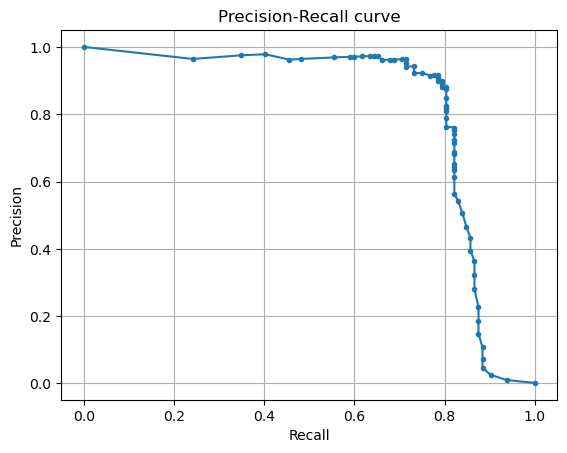

In [22]:
precision,recall,threshold = precision_recall_curve(y_test,y_probs)
plt.plot(recall,precision,marker='.', label='Random forest(AUROC=%0.2f)')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

#### Area Under the PR Curve

In [23]:
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

PR AUC: 0.82


### Based on PR curve and classification report we can say that our model has predicted accurate values on the trained data 

### Feature Importance

In [27]:
feature_names = x.columns
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [28]:
importances = random_forest_classifier.feature_importances_
importances

array([0.01247927, 0.02434403, 0.04463022, 0.08162584, 0.01067152,
       0.01313391, 0.0260713 , 0.01338303, 0.0191454 , 0.11693531,
       0.07745046, 0.14292197, 0.00786896, 0.18185079, 0.00570827,
       0.04629954, 0.07662931, 0.01185947, 0.0150979 , 0.00902656,
       0.01100097, 0.00491896, 0.00561135, 0.00470466, 0.00612098,
       0.00706688, 0.00820298, 0.00664899, 0.00859119])

In [29]:
feature_importances_model = pd.DataFrame({'Feature': feature_names,'Importances': importances}).sort_values(by='Importances',ascending=False,).reset_index(drop=True)
feature_importances_model.head()

,Feature,Importances
0,V14,0.181851
1,V12,0.142922
2,V10,0.116935
3,V4,0.081626
4,V11,0.077450


#### Feature importance is a technique used in machine learning to determine which features (or variables) contribute the most to the predictive power of a model.

# Hyperparameter Tuning 

#### Tunning the paramters to improve the model performance

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest 
n_estimators = [500,700]

# Maximum depth of each tree
max_depth = [20]

# minimum samples required to split an internal node
min_samples_split = [7,9]

# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [4,6]

In [89]:
param_grid = {'n_estimators':n_estimators,
              'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf,
              'min_samples_split': min_samples_split}

print(param_grid)

{'n_estimators': [500, 700], 'max_depth': [20], 'min_samples_leaf': [4, 6], 'min_samples_split': [7, 9]}


In [90]:
rf = RandomForestClassifier()
rf_grid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')

In [91]:
rf_grid.fit(x_somte,y_somte)

y_predict_rf = rf_grid.predict(x_test_scaled)

print(confusion_matrix(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[[70800    20]
 [   22    90]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.82      0.80      0.81       112

    accuracy                           1.00     70932
   macro avg       0.91      0.90      0.91     70932
weighted avg       1.00      1.00      1.00     70932



In [92]:
rf_grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_depth': 20}

In [74]:
rf_grid.best_score_

0.9998022905547046

In [30]:
# Get predicted probabilities
y_probs1 = rf_grid.predict_proba(x_test_scaled)[:, 1]
y_probs1

array([0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ])

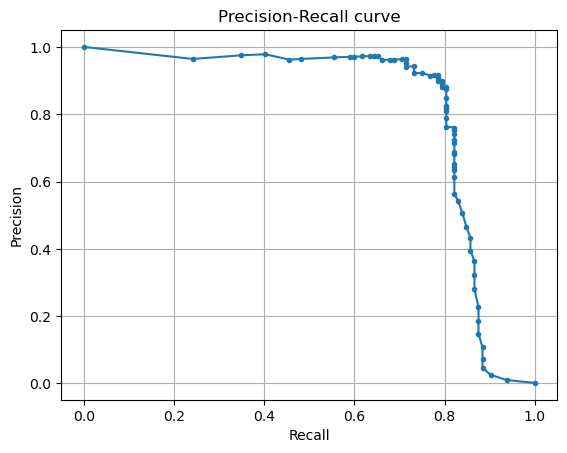

In [31]:
precision_1,recall_1,threshold_1 = precision_recall_curve(y_test,y_probs_1)
plt.plot(recall,precision,marker='.', label='Random forest(AUROC=%0.2f)')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

### Pickling the file

In [15]:
import pickle

In [16]:
pickle.dump(random_forest_classifier,open('classifimodi.pkl','wb'))

In [32]:
pickle_model = pickle.load(open('classifimod.pkl','rb'))